# DSN - Exercise 2

Due 29/01/2024, 23:59.

**Submission guidelines:**
- You should submit to the moodle a jupyter notebook (ipynb file) with all your code, explanations (in English) and graphs.
- You should write clear, self-explanatory, documented code.
- Submission is in pairs (but you should switch your partner every exercise).



## Notebook setup

In [2]:
# numerical library
import numpy as np

# plotting library
import matplotlib.pyplot as plt

# google colab upload utility
# from google.colab import files

# zipfile utility
import zipfile

## Questions




### Question 1: Forward Euler Method

The membrane equation for a single compartment neuron with passive properties can be written as:

$C\frac{dV}{dt} = -\frac{V(t)}{R} + I$

We have shown in class that we can approximate it using the forward Euler method as:

$ V(t+\Delta t) = V(t) + \left( -\frac{V(t)}{RC} + \frac{I}{C} \right) \cdot \Delta t$

Write a python function, based on the one that was shown in class, that
implements the forward eurler method to mimic a single compartment passive neuron.

The function should use the forward Euler methods to compute $V(t)$ as a function of $I(t)$ assuming passive properties:


*   $R$ – cell resistance: default $25 M \Omega$ (25e6 $\Omega$)
*   $C$ – cell capacitance: default $1 nF$ (1e-9 F)
*   $V(0) = 0$
*   $dt$ - time step: default $0.1 ms$ (1e-4 $s$)
*   $I = 0 nA$

In [3]:
def forward_euler_passive_neuron(t, dt=0.1, R=25, C=1, V_init=0, I=0):

    time_axis = np.arange(0, t, dt)
    v_membrane = np.zeros(len(time_axis))
    v_membrane[0] = V_init

    for t in range(1, len(time_axis)):
        v_membrane[t] = v_membrane[t - 1] + dt * (- v_membrane[t - 1] / (R * C) + I / C)

    return v_membrane, time_axis


#### 1.1

Integrate the membrane equation for $100 ms$ (in other words calculate a vector of V(i) for each time step from $t=0$ to $t=100ms$), while assuming $V(0) = 0$.

Plot $V$ as a function of $t$.

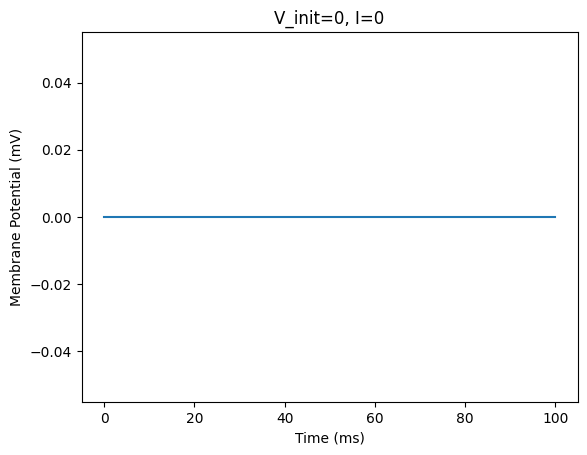

In [4]:
v_membrane, time_axis = forward_euler_passive_neuron(t=100, dt=0.1, R=25, C=1, V_init=0, I=0)

plt.plot(time_axis, v_membrane)
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.title('V_init=0, I=0')
plt.show()

#### 1.2

Repeat 1.1 with $V(0) = 10 mV$.

Plot $V$ as a function of $t$.

Explain what do you see.

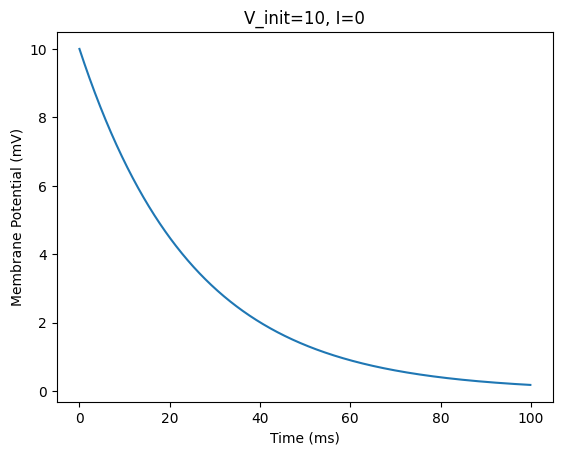

In [5]:
v_membrane, time_axis = forward_euler_passive_neuron(t=100, dt=0.1, R=25, C=1, V_init=10, I=0)

plt.plot(time_axis, v_membrane)
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.title('V_init=10, I=0')
plt.show()

The membrane potential declines in a logarithmic manner from the initial voltage, as no current is injected.

#### 1.3

Repeat 1.1, 1.2 with $ I = 0.5 nA $.

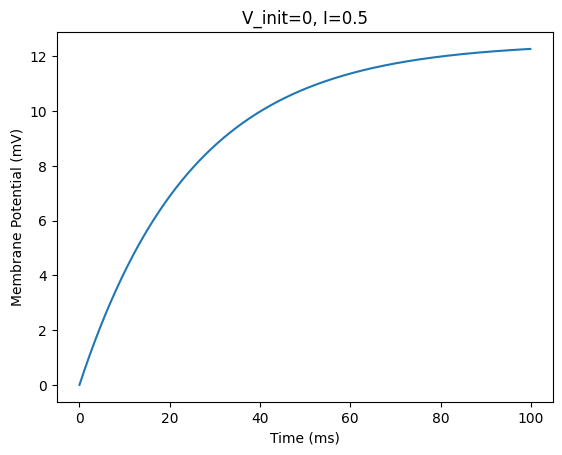

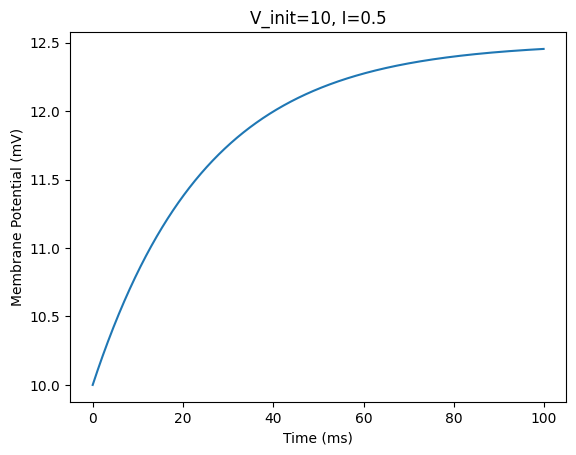

In [6]:
v_membrane, time_axis = forward_euler_passive_neuron(t=100, dt=0.1, R=25, C=1, V_init=0, I=0.5)

plt.plot(time_axis, v_membrane)
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.title('V_init=0, I=0.5')
plt.show()

v_membrane, time_axis = forward_euler_passive_neuron(t=100, dt=0.1, R=25, C=1, V_init=10, I=0.5)

plt.plot(time_axis, v_membrane)
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.title('V_init=10, I=0.5')
plt.show()

The membrane potential charges similar to a capacitor, in the same way for each initial membrane potential.

### Question 2: The Integrate and Fire model

You should now extend the function you wrote for question 1, to model an integrate and fire model.


This model is identical for subthreshold membrane potential. But when the membrane potential exceeds a voltage threshold, we say there was a spike, reset the membrane potential to a specific voltage ($V_{reset}$) and wait for a short refractory period $T_{refrac}$ (we ignore any input and clamp the membrane potential to $V_{reset}$).

Use the following values:


*   $V_{th}$: $15 mV$
*   $V_{reset}$: $0 mV$
*   $T_{refrac}$: $3 ms$

In [7]:
def integrate_and_fire(t, dt, R, C, Vth, Vreset, Trefrac, I):

    time_axis = np.arange(0, t, dt)
    v_membrane = np.zeros(len(time_axis))
    v_membrane[0] = Vreset  # Initial membrane potential set to reset value
    spike_count = 0
    refractory_steps = int(Trefrac / dt)

    # Simulation loop using Forward Euler method
    for t in range(1, len(time_axis)):
        if refractory_steps > 0:
            refractory_steps -= 1
            v_membrane[t] = Vreset  # Clamp membrane potential during refractory period
        else:
            v_membrane[t] = v_membrane[t - 1] + dt * (- v_membrane[t - 1] / (R * C) + I / C)

            if v_membrane[t] >= Vth:
                spike_count += 1
                v_membrane[t] = Vreset  # Reset membrane potential
                refractory_steps = int(Trefrac / dt)

    spike_frequency = spike_count / (len(time_axis) * dt * 1e-3)

    return spike_frequency

#### 2.1

Run the model for $1 sec$ (simulation time) for different injected current values ($I=0$,
$I=0.1nA, 0.2nA \dots 1.5nA$).

For each injected current compute the spike frequency of
the model (how many spikes/sec) and plot a graph of frequency vs current.

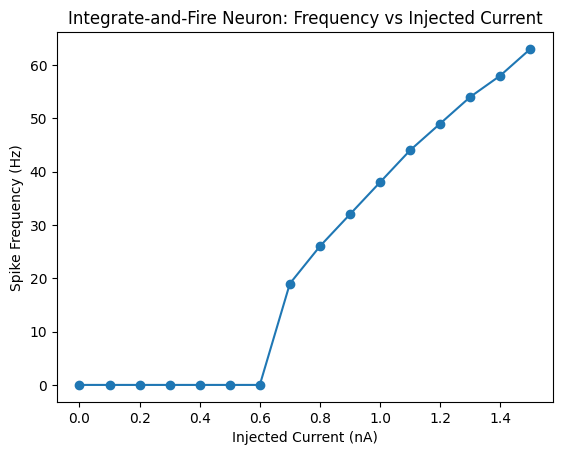

In [8]:
# Example usage for different injected currents
current_amplitudes = np.arange(0, 1.6, 0.1)  # Injected currents from 0 to 1.5 nA
spike_frequencies = []

for I in current_amplitudes:
    t=1000 # 1s = 1000ms
    spike_frequency = integrate_and_fire(t=t, dt=0.1, R=25, C=1, Vth=15, Vreset=0, Trefrac=3, I=I)
    spike_frequencies.append(spike_frequency)

plt.plot(current_amplitudes, spike_frequencies, 'o-')
plt.xlabel('Injected Current (nA)')
plt.ylabel('Spike Frequency (Hz)')
plt.title('Integrate-and-Fire Neuron: Frequency vs Injected Current')
plt.show()

#### 2.2 Bonus (10 points)
How do $R$, $C$ and the refractory period affect this graph. Is there a
maximum frequency? What is it?

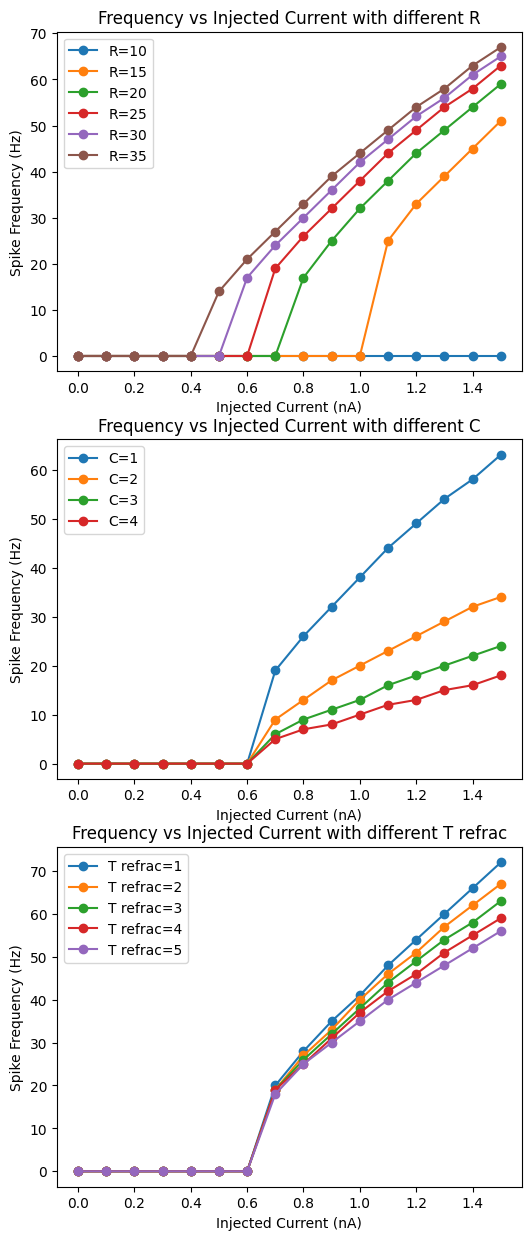

In [9]:
current_amplitudes = np.arange(0, 1.6, 0.1)

plt.figure(figsize=(6, 15))
plt.subplot(3, 1, 1)
for R in range(10, 40, 5):
  spike_frequencies = []
  for I in current_amplitudes:
      t=1000 # 1s = 1000ms
      spike_frequency = integrate_and_fire(t=t, dt=0.1, R=R, C=1, Vth=15, Vreset=0, Trefrac=3, I=I)
      spike_frequencies.append(spike_frequency)

  plt.plot(current_amplitudes, spike_frequencies, 'o-', label=f'R={R}')
plt.xlabel('Injected Current (nA)')
plt.ylabel('Spike Frequency (Hz)')
plt.legend()
plt.title('Frequency vs Injected Current with different R')

plt.subplot(3, 1, 2)
for C in range(1, 5, 1):
  spike_frequencies = []
  for I in current_amplitudes:
      t=1000 # 1s = 1000ms
      spike_frequency = integrate_and_fire(t=t, dt=0.1, R=25, C=C, Vth=15, Vreset=0, Trefrac=3, I=I)
      spike_frequencies.append(spike_frequency)

  plt.plot(current_amplitudes, spike_frequencies, 'o-', label=f'C={C}')
plt.xlabel('Injected Current (nA)')
plt.ylabel('Spike Frequency (Hz)')
plt.legend()
plt.title('Frequency vs Injected Current with different C')

plt.subplot(3, 1, 3)
for Trefrac in range(1, 6, 1):
  spike_frequencies = []
  for I in current_amplitudes:
      t=1000 # 1s = 1000ms
      spike_frequency = integrate_and_fire(t=t, dt=0.1, R=25, C=1, Vth=15, Vreset=0, Trefrac=Trefrac, I=I)
      spike_frequencies.append(spike_frequency)

  plt.plot(current_amplitudes, spike_frequencies, 'o-', label=f'T refrac={Trefrac}')
plt.xlabel('Injected Current (nA)')
plt.ylabel('Spike Frequency (Hz)')
plt.legend()
plt.title('Frequency vs Injected Current with different T refrac')
plt.show()





When looking at the Euler equation, one can tell that increasing R increases the impact of the injected current on the voltage, and therefore on the firing frequency. This explains why the cell is more responsive to lower currents injected for higher values of R. 

On the other hand, increasing C directly decreases the impact of the current (I/C component), while at the same time increasing C increases the membrane time constant (τ=R⋅C). A larger time constant means slower charging and discharging of the membrane, leading to a smoother response to injected currents. So, a higher capacitance can result in lower spike frequencies for the injected current.

A longer refractory period increases the time during which the neuron is unresponsive to stimuli after a spike. This limits the maximum achievable spike frequency (which is 1/T_refract = 1/0.003 = 333Hz in this case). Shorter refractory periods allow the neuron to respond more rapidly to subsequent stimuli, thus increasing the firing rate.


### Question 3: Fit a neuronal response with an I&F model

Download the text files in the attached zip file.

These files are the results of two experiments
were voltage is recorded from a neuron as a response to an injected current.

In [10]:
# Upload the zip file only once, using this code (or via the gui)
# files.upload()

# working offline
import os
import zipfile
# load the current directory
dir = os.getcwd()
file = os.path.join(dir, 'Neuron2.zip')
# Unzip the zip file only once
neuron2_zip = zipfile.ZipFile(file, 'r')
neuron2_zip.extractall('Neuron2')

In [11]:
# After that, you can load the experiment recording like so:
with open("Neuron2/i2.txt") as f:
    currents = [np.float64(i) for i in f.read().split("  ")[1:]]
with open("Neuron2/v2.txt") as f:
    voltages = [np.float64(i) for i in f.read().split("  ")[1:]]
with open("Neuron2/t2.txt") as f:
    times = [np.float64(i) for i in f.read().split("  ")[1:]]

#### 3.1

Plot the voltage an the current as a function of time.

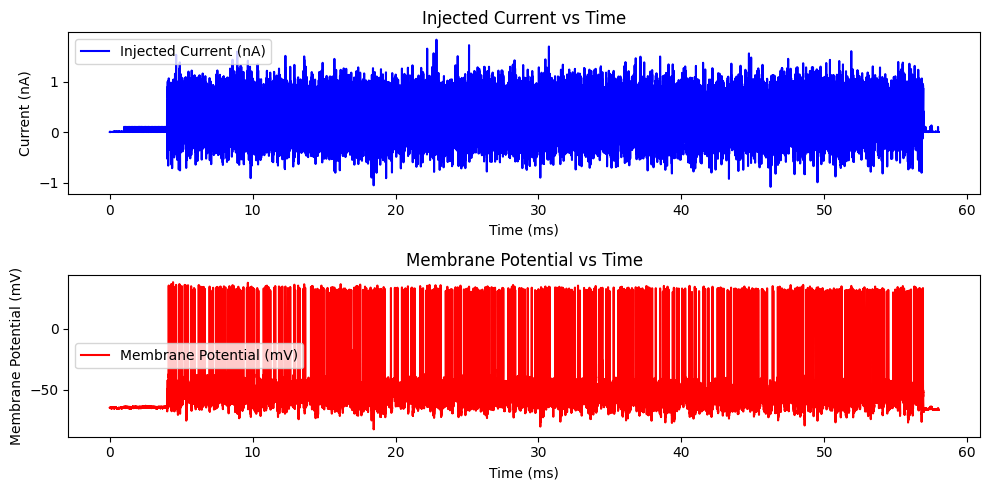

In [12]:
plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
plt.plot(times, currents, label='Injected Current (nA)', color='blue')
plt.xlabel('Time (ms)')
plt.ylabel('Current (nA)')
plt.title('Injected Current vs Time')
plt.legend()

# Plotting the voltage as a function of time
plt.subplot(2, 1, 2)
plt.plot(times, voltages, label='Membrane Potential (mV)', color='red')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.title('Membrane Potential vs Time')
plt.legend()

plt.tight_layout()
plt.show()

#### 3.2

Find the longest piece of time $T$ where no spikes occur.

Find $R$ and $C$ such that when you integrate your model injecting $I(t)$ over the period $T$ to your model neuron,
the error $ \langle V_{model}(t) - V_{neuron}(t) \rangle_{T}$ is minimized.

Hints:
1.   You need to make a small changes to your model such that resting membrane potential is not 0).
2.   You should try different combinations of $R$ and $C$, where $10 M\Omega < R < 50 M\Omega$ and $0.1nF < C < 1nF$, for each of these combinations calculate the error, and choose the $R$ and $C$ that give minimal error.

In [13]:
def find_longest_spike_free_period_after_first(times, voltages, threshold_voltage):
    # Identify intervals without spikes (where voltage < threshold_voltage) after the first spike
    spike_free_periods = []
    current_spike_free_period = []
    first_spike_found = False

    for t, V_neuron in zip(times, voltages):
        if not first_spike_found:
            if V_neuron >= threshold_voltage:
                first_spike_found = True
        else:
            if V_neuron < threshold_voltage:
                current_spike_free_period.append(t)
            else:
                if current_spike_free_period:
                    spike_free_periods.append(current_spike_free_period)
                    current_spike_free_period = []

    longest_spike_free_period = max(spike_free_periods, key=len, default=[])

    return longest_spike_free_period[-1] - longest_spike_free_period[0]

T = find_longest_spike_free_period_after_first(times, voltages, 0)
print(f'longest piece of time where no spikes occur is {round(T, 3)} ms')


longest piece of time where no spikes occur is 0.445 ms


In [14]:
possible_R = np.arange(10, 50, 10)
possible_C = np.arange(0.1, 1, 0.1)

searched_combinations = []
errors = []

Vth=15
Vreset=0
Trefrac=3
for R in possible_R:
    for C in possible_C:
        t = times[-1]
        dt = times[1] - times[0]
        v_model = integrate_and_fire(t, dt, R, C, Vth, Vreset, Trefrac, I)
        v_neuron = voltages

        error = np.mean((v_model - v_neuron)**2)

        searched_combinations.append((R, C))
        errors.append(error)

errors = np.array(errors)
searched_combinations = np.array(searched_combinations)
minimal_error_index = np.argmin(errors)
minimal_error = errors[minimal_error_index]
best_combination = searched_combinations[minimal_error_index]

print(f"Minimal Error: {minimal_error}")
print(f"Best Combination (R, C): {best_combination}")



Minimal Error: 3023.43932570299
Best Combination (R, C): [10.   0.1]


#### 3.3

For different values of voltage threshold compute the number N_TP of True Positive (i.e.
spikes that the model predict within $2 ms$ from a true spike) and the number N_FP of
False Positives (spikes that the model predicts that have no true spike within $2ms$ from
them) and plot the ROC curve.

Hints:

1.   See https://en.wikipedia.org/wiki/Receiver_operating_characteristic
2.   The function np.intersect1d
3.   In order to calculate the ROC curve you should iterate over different thresholds, and for each of them calculate it's respective TPR and FPR values.


In [15]:
def integrate_and_fire_vec(t, dt, R, C, Vth, Vreset, Trefrac, I):

    time_axis = np.arange(0, t, dt)
    v_membrane = np.zeros(len(time_axis))
    v_membrane[0] = Vreset  # Initial membrane potential set to reset value
    spike_count = 0
    refractory_steps = int(Trefrac / dt)
    spikes_ind = []

    # Simulation loop using Forward Euler method
    for t in range(1, len(time_axis)):
        if refractory_steps > 0:
            refractory_steps -= 1
            v_membrane[t] = Vreset  # Clamp membrane potential during refractory period
        else:
            v_membrane[t] = v_membrane[t - 1] + dt * (- v_membrane[t - 1] / (R * C) + I[t-1] / C)

            if v_membrane[t] >= Vth:
                spike_count += 1
                spikes_ind.append(t)
                v_membrane[t] = Vreset  # Reset membrane potential
                refractory_steps = int(Trefrac / dt)
    return spikes_ind

def neuron_spikes(voltages, threshold_voltage):
    return [spike for spike in voltages if spike > threshold_voltage]

# THIS METHOD IS WAY WAY WAAAAAAAAAAY TOO LONG 
def predict_spikes(t, dt, R, C, Vth, Vreset, Trefrac):
    return integrate_and_fire_vec(t, dt, R, C, Vth, Vreset, Trefrac, currents)

def compute_tp_fp(true_spikes, predicted_spikes, tolerance_ms, time_step):
    N_TP = sum(1 for p_spike in predicted_spikes if any(abs(p_spike - t_spike) <= tolerance_ms/time_step for t_spike in true_spikes))
    N_FP = len(predicted_spikes) - N_TP
    return N_TP, N_FP

tolerance_ms = 2


In [17]:

thresholds = [15, 20, 25, 30, 35, 40, 45, 50]
tpr_list = []
fpr_list = []
t = times[-1]
dt = times[1] - times[0]
R = 10
C = .1
Vreset = 0
Trefrac = 3
for threshold in thresholds:
    true_spikes = neuron_spikes(voltages, threshold)
    predicted_spikes = predict_spikes(t, dt, R, C, threshold, Vreset, Trefrac)
    N_TP, N_FP = compute_tp_fp(true_spikes, predicted_spikes, tolerance_ms, dt)
    # Calculate TPR and FPR here and append to tpr_list and fpr_list
    tpr = N_TP / len(true_spikes)
    fpr = N_FP / len(predicted_spikes)
    tpr_list.append(tpr)
    fpr_list.append(fpr)

# Now plot the ROC curve using tpr_list and fpr_list
plt.plot(fpr_list, tpr_list)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

ZeroDivisionError: division by zero

#### 3.4

What is the number of true positive spikes for FP rate of 0.25%?

What are your conclusions about the integrate and
fire model as a model of a neuron?